# PROYECTO SINIESTROS VIALES
## Elias Buitrago Bolivar
### Fecha 27 marzo 2023

En este cuaderno de jupyter se realiza un flujo de trabajo para predecir la severidad de siniestros viales, a partir de una base de datos de la Secretaría Distrital.

### Importar librerías

In [8]:
import numpy as np
import pandas as pd

### Cargar datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# dataini = pd.read_csv('historico_siniestros_bogota_d.c_-.csv')
dataini = pd.read_csv('/content/drive/MyDrive/data/historico_siniestros_bogota_d.c_-.csv')

In [18]:
dataini.head()

,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,-74.090924,4.693807,1,A000640275,4484660,2017/06/12 00:00:00+00,2017,AV AVENIDA BOYACA-CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,2017/06/12 05:30:00+00,4.693807,-74.090924,10006772.0,221236.0
1,-74.121000,4.603000,2,A001233353,10533499,2020/11/19 00:00:00+00,2020,CL 26 S- KR 50 02,CON HERIDOS,OTRO,PUENTE ARANDA,2020/11/19 02:05:00+00,4.603000,-74.121000,16004560.0,NaN
2,-74.042000,4.682000,4,A001232786,10533629,2020/11/10 00:00:00+00,2020,KR 9 - CL 100 02,SOLO DANOS,CHOQUE,USAQUEN,2020/11/10 13:30:00+00,4.682000,-74.042000,30001107.0,NaN
3,-74.166937,4.587187,7,A000200705,4412699,2015/05/11 00:00:00+00,2015,CL 63A-KR 72 S 02,SOLO DANOS,CHOQUE,CIUDAD BOLIVAR,2015/05/11 10:50:00+00,4.587187,-74.166937,19001483.0,136166.0
4,-74.092901,4.607648,8,A000402862,4447845,2016/06/08 00:00:00+00,2016,KR 27-CL 9 14,SOLO DANOS,CHOQUE,LOS MARTIRES,2016/06/08 21:30:00+00,4.607648,-74.092901,14000548.0,239719.0


In [19]:
data = dataini

data = data.drop(['X','Y','OBJECTID','FORMULARIO','CODIGO_ACCIDENTE','FECHA_OCURRENCIA_ACC','ANO_OCURRENCIA_ACC','DIRECCION','CIV','PK_CALZADA', ], axis=1)
data.head()

,GRAVEDAD,CLASE_ACC,LOCALIDAD,FECHA_HORA_ACC,LATITUD,LONGITUD
0,SOLO DANOS,CHOQUE,ENGATIVA,2017/06/12 05:30:00+00,4.693807,-74.090924
1,CON HERIDOS,OTRO,PUENTE ARANDA,2020/11/19 02:05:00+00,4.603000,-74.121000
2,SOLO DANOS,CHOQUE,USAQUEN,2020/11/10 13:30:00+00,4.682000,-74.042000
3,SOLO DANOS,CHOQUE,CIUDAD BOLIVAR,2015/05/11 10:50:00+00,4.587187,-74.166937
4,SOLO DANOS,CHOQUE,LOS MARTIRES,2016/06/08 21:30:00+00,4.607648,-74.092901


In [20]:
# df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month
# data['AÑO'] = data['FECHA_OCURRENCIA_ACC'].
data['AÑO'] = pd.DatetimeIndex(data['FECHA_HORA_ACC']).year

In [21]:
data['MES'] = pd.DatetimeIndex(data['FECHA_HORA_ACC']).month

In [22]:
data['DIA'] = pd.DatetimeIndex(data['FECHA_HORA_ACC']).day

In [23]:
# data['HORA'] = pd.DatetimeIndex(data['FECHA_HORA_ACC']).time #HH:MM:SS
data['HORA'] = pd.DatetimeIndex(data['FECHA_HORA_ACC']).hour #HH

In [24]:
data.head()

,GRAVEDAD,CLASE_ACC,LOCALIDAD,FECHA_HORA_ACC,LATITUD,LONGITUD,AÑO,MES,DIA,HORA
0,SOLO DANOS,CHOQUE,ENGATIVA,2017/06/12 05:30:00+00,4.693807,-74.090924,2017,6,12,5
1,CON HERIDOS,OTRO,PUENTE ARANDA,2020/11/19 02:05:00+00,4.603000,-74.121000,2020,11,19,2
2,SOLO DANOS,CHOQUE,USAQUEN,2020/11/10 13:30:00+00,4.682000,-74.042000,2020,11,10,13
3,SOLO DANOS,CHOQUE,CIUDAD BOLIVAR,2015/05/11 10:50:00+00,4.587187,-74.166937,2015,5,11,10
4,SOLO DANOS,CHOQUE,LOS MARTIRES,2016/06/08 21:30:00+00,4.607648,-74.092901,2016,6,8,21


In [25]:
data = data.drop('FECHA_HORA_ACC',axis=1)
data.head()

,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD,AÑO,MES,DIA,HORA
0,SOLO DANOS,CHOQUE,ENGATIVA,4.693807,-74.090924,2017,6,12,5
1,CON HERIDOS,OTRO,PUENTE ARANDA,4.603000,-74.121000,2020,11,19,2
2,SOLO DANOS,CHOQUE,USAQUEN,4.682000,-74.042000,2020,11,10,13
3,SOLO DANOS,CHOQUE,CIUDAD BOLIVAR,4.587187,-74.166937,2015,5,11,10
4,SOLO DANOS,CHOQUE,LOS MARTIRES,4.607648,-74.092901,2016,6,8,21


In [26]:
data.shape

(43195, 9)

In [27]:
data = pd.get_dummies(data, columns=['CLASE_ACC','LOCALIDAD'])
data.head()

,GRAVEDAD,LATITUD,LONGITUD,AÑO,MES,DIA,HORA,CLASE_ACC_ATROPELLO,CLASE_ACC_AUTOLESION,CLASE_ACC_CAIDA DE OCUPANTE,...,LOCALIDAD_LOS MARTIRES,LOCALIDAD_PUENTE ARANDA,LOCALIDAD_RAFAEL URIBE URIBE,LOCALIDAD_SAN CRISTOBAL,LOCALIDAD_SANTA FE,LOCALIDAD_SUBA,LOCALIDAD_TEUSAQUILLO,LOCALIDAD_TUNJUELITO,LOCALIDAD_USAQUEN,LOCALIDAD_USME
0,SOLO DANOS,4.693807,-74.090924,2017,6,12,5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,CON HERIDOS,4.603000,-74.121000,2020,11,19,2,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,SOLO DANOS,4.682000,-74.042000,2020,11,10,13,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,SOLO DANOS,4.587187,-74.166937,2015,5,11,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,SOLO DANOS,4.607648,-74.092901,2016,6,8,21,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [28]:
data.shape

(43195, 33)

In [29]:
data.dtypes

GRAVEDAD                         object
LATITUD                         float64
LONGITUD                        float64
AÑO                               int32
MES                               int32
DIA                               int32
HORA                              int32
CLASE_ACC_ATROPELLO                bool
CLASE_ACC_AUTOLESION               bool
CLASE_ACC_CAIDA DE OCUPANTE        bool
CLASE_ACC_CHOQUE                   bool
CLASE_ACC_INCENDIO                 bool
CLASE_ACC_OTRO                     bool
CLASE_ACC_VOLCAMIENTO              bool
LOCALIDAD_ANTONIO NARINO           bool
LOCALIDAD_BARRIOS UNIDOS           bool
LOCALIDAD_BOSA                     bool
LOCALIDAD_CANDELARIA               bool
LOCALIDAD_CHAPINERO                bool
LOCALIDAD_CIUDAD BOLIVAR           bool
LOCALIDAD_ENGATIVA                 bool
LOCALIDAD_FONTIBON                 bool
LOCALIDAD_KENNEDY                  bool
LOCALIDAD_LOS MARTIRES             bool
LOCALIDAD_PUENTE ARANDA            bool


In [30]:
data['GRAVEDAD']

0         SOLO DANOS
1        CON HERIDOS
2         SOLO DANOS
3         SOLO DANOS
4         SOLO DANOS
            ...     
43190     SOLO DANOS
43191     SOLO DANOS
43192     SOLO DANOS
43193     SOLO DANOS
43194     SOLO DANOS
Name: GRAVEDAD, Length: 43195, dtype: object

In [31]:
data['GRAVEDAD'] = pd.Categorical(data['GRAVEDAD'])
categories = data.GRAVEDAD.cat.categories
codes = data.GRAVEDAD.cat.codes

In [32]:
categories

Index(['CON HERIDOS', 'CON MUERTOS', 'SOLO DANOS'], dtype='object')

In [33]:
data['GRAVEDAD'] = data.GRAVEDAD.cat.codes
data.dtypes

GRAVEDAD                           int8
LATITUD                         float64
LONGITUD                        float64
AÑO                               int32
MES                               int32
DIA                               int32
HORA                              int32
CLASE_ACC_ATROPELLO                bool
CLASE_ACC_AUTOLESION               bool
CLASE_ACC_CAIDA DE OCUPANTE        bool
CLASE_ACC_CHOQUE                   bool
CLASE_ACC_INCENDIO                 bool
CLASE_ACC_OTRO                     bool
CLASE_ACC_VOLCAMIENTO              bool
LOCALIDAD_ANTONIO NARINO           bool
LOCALIDAD_BARRIOS UNIDOS           bool
LOCALIDAD_BOSA                     bool
LOCALIDAD_CANDELARIA               bool
LOCALIDAD_CHAPINERO                bool
LOCALIDAD_CIUDAD BOLIVAR           bool
LOCALIDAD_ENGATIVA                 bool
LOCALIDAD_FONTIBON                 bool
LOCALIDAD_KENNEDY                  bool
LOCALIDAD_LOS MARTIRES             bool
LOCALIDAD_PUENTE ARANDA            bool


In [34]:
data['GRAVEDAD'].head()

0    2
1    0
2    2
3    2
4    2
Name: GRAVEDAD, dtype: int8

In [35]:
X = data.drop('GRAVEDAD', axis=1)
X.shape

(43195, 32)

In [36]:
Y=pd.DataFrame()
Y['GRAVEDAD'] = data['GRAVEDAD']
Y.shape

(43195, 1)

In [37]:
print(data['GRAVEDAD'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')

GRAVEDAD
2    65.8%
0    32.7%
1     1.6%
Name: proportion, dtype: object


### Transformación datos: media cero y varianza unitaria

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
# Media cero y varianza unitaria
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape


(43195, 32)

### Partición conjuntos de datos: Entrenamiento, prueba y validación

In [40]:
from sklearn.model_selection import train_test_split as split

In [41]:
## # Definir función para particionar el conjunto de datos

X_train, X_test, y_train, y_test = split(Xt,Y,
                                         test_size=0.30,
                                         random_state=42,
                                         stratify=Y)

# X_train, X_valid, y_train, y_valid = split(X_train, y_train,
#                                            test_size=0.2,
#                                            stratify=y_train)

## Modelos Supervisados

### Árboles de decisión

In [42]:
# import xgboost as xgb
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


               precision    recall  f1-score   support

           0       0.83      0.42      0.56      4234
           1       0.12      0.02      0.04       204
           2       0.77      0.97      0.86      8521

    accuracy                           0.78     12959
   macro avg       0.57      0.47      0.49     12959
weighted avg       0.78      0.78      0.75     12959



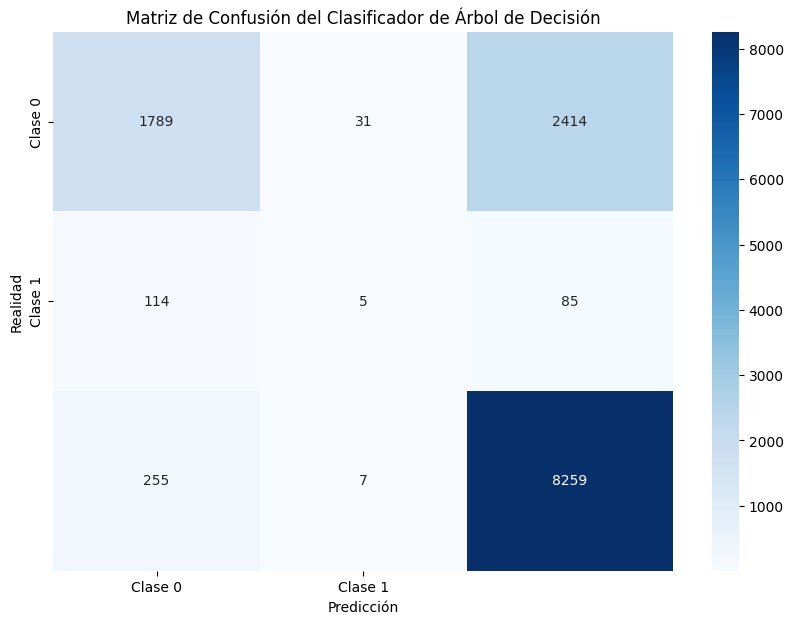

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Definir función para particionar el conjunto de datos
def split(X, y, test_size=0.30, random_state=42, stratify=None):
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=stratify)

# Particionar el conjunto de datos
X_train, X_test, y_train, y_test = split(Xt, Y, test_size=0.30, random_state=42, stratify=Y)

# Imputar valores faltantes usando la media de cada columna
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Definición del modelo con parámetros ajustados
arbol1 = DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=42)

# Entrenamiento y evaluación del modelo
arbol1 = arbol1.fit(X_train, y_train)
y_pred = arbol1.predict(X_test)

# Calcular métricas de desempeño
print("\n", metrics.classification_report(y_test, y_pred, digits=2))

# Visualizar matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión del Clasificador de Árbol de Decisión')
plt.show()


### Random Forests

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd



               precision    recall  f1-score   support

           0       0.87      0.42      0.57      4234
           1       0.50      0.01      0.02       204
           2       0.77      0.98      0.86      8521

    accuracy                           0.78     12959
   macro avg       0.71      0.47      0.48     12959
weighted avg       0.80      0.78      0.75     12959



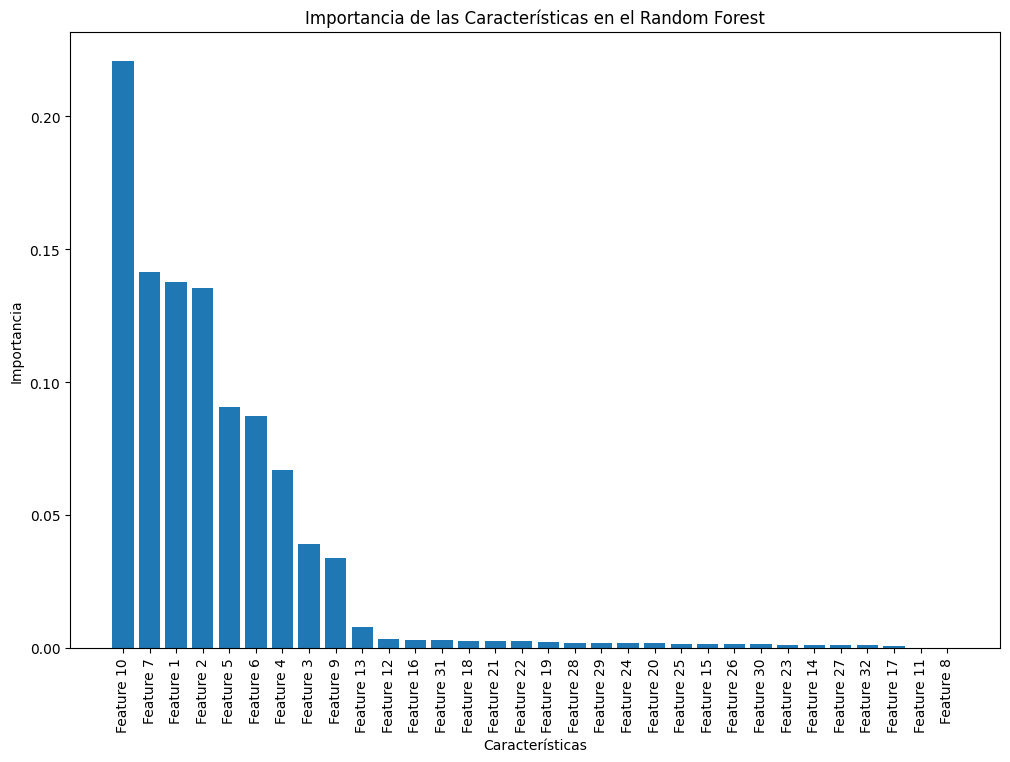

In [53]:
# Asegurarse de que y_train es un array 1D
# Convertir y_train a una forma de array 1D usando .values.ravel()
y_train = y_train.values.ravel()

# Definición del modelo de Random Forest con parámetros ajustados
# Se establece un número mayor de estimadores para mejorar el rendimiento del modelo
rfc = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)

# Entrenamiento del modelo
# Ajustamos el modelo a los datos de entrenamiento
rfc.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
# Se hacen predicciones para evaluar el desempeño del modelo
y_pred2 = rfc.predict(X_test)

# Imprimir el informe de clasificación
# Muestra las métricas de precisión, recall y F1-score
print("\n", metrics.classification_report(y_test, y_pred2, digits=2))

# Crear un DataFrame para contener las características y sus importancias
# Si X_train es un DataFrame, usamos sus columnas; si no, usamos un rango de nombres
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f'Feature {i+1}' for i in range(X_train.shape[1])]

# Visualizar la importancia de las características
# Muestra cómo cada característica contribuye al modelo
importances = rfc.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(12,8))
plt.title('Importancia de las Características en el Random Forest')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()



### Redes Neuronales Artificiales

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import utils as np_utils

In [ ]:
#Transformación de datos requerida para RNA
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
Y_valid = np_utils.to_categorical(y_valid)

In [ ]:
# Definir función para construir RNA
def construrna():
    #Contruir RNA
    model = models.Sequential()
    model.add(layers.Dense(8, activation='tanh'))
    model.add(layers.Dense(8,  activation='tanh'))
    model.add(layers.Dense(4, activation='sigmoid'))

# compile the keras (tensorflow) flow graph
    model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Definir función para entrenar RNA
def trainrna(model, epo, batch,partial_x_train,partial_y_train,x_val,y_val):
    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=epo,
                        batch_size=batch,
                        validation_data=(x_val, y_val),
                        verbose=1)
    return history

In [ ]:
# Métricas de desempeño
def metricas_rna(model_rna, X_test, Y_test):

#     # Exactitud
#     test_loss, test_acc = model.evaluate(X_test, Y_test)# testeo de la red con los de prueba
#     print('\nExactitud evaluación:',test_acc)
    Y_pred = model_rna.predict_classes(X_test, batch_size=32, verbose=1)
    Y_pred = np_utils.to_categorical(Y_pred)

    # Mostrar la precisión, recall, F1-score
    print("\n", metrics.classification_report(Y_test, Y_pred, digits=3))

    return Y_pred

In [ ]:
# Construir la red neuronal
model_rna = construrna()

In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(111521, 33)
(27881, 33)
(111521, 1)
(27881, 1)


In [ ]:
#Reshaping labels as 2d-tensor (the first dimension will be the batch dimension and the second the scalar label):
# Our vectorized labels
#Y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
#Y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
#Y_valid = np.asarray(y_valid).astype('float32').reshape((-1,1))

In [ ]:
# Entrenar la red neuronal
history_rna = trainrna(model_rna, 5, 32, X_train,Y_train,X_valid,Y_valid)

Epoch 1/5
3486/3486 [==============================] - 9s 2ms/step - loss: 0.5972 - accuracy: 0.7531 - val_loss: 0.5490 - val_accuracy: 0.7727
Epoch 2/5
3486/3486 [==============================] - 7s 2ms/step - loss: 0.5494 - accuracy: 0.7700 - val_loss: 0.5460 - val_accuracy: 0.7724
Epoch 3/5
3486/3486 [==============================] - 8s 2ms/step - loss: 0.5473 - accuracy: 0.7700 - val_loss: 0.5445 - val_accuracy: 0.7714
Epoch 4/5
3486/3486 [==============================] - 7s 2ms/step - loss: 0.5454 - accuracy: 0.7699 - val_loss: 0.5435 - val_accuracy: 0.7721
Epoch 5/5
3486/3486 [==============================] - 8s 2ms/step - loss: 0.5446 - accuracy: 0.7691 - val_loss: 0.5439 - val_accuracy: 0.7711


In [ ]:
predict_x=model_rna.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

1867/1867 [==============================] - 3s 2ms/step


In [ ]:
print(predict_x)
print(classes_x)

[[6.0067236e-05 8.3852673e-01 6.2412041e-01 5.1589470e-02]
 [1.9262842e-04 8.6448449e-01 6.3736737e-01 5.7995848e-02]
 [1.1930994e-04 7.8821629e-01 6.9847596e-01 7.6033302e-02]
 ...
 [8.9585061e-05 8.7120116e-01 6.3033885e-01 6.3908815e-02]
 [1.7273051e-05 8.9958370e-01 6.7482793e-01 3.7549566e-02]
 [1.1143089e-04 8.0705833e-01 6.3873357e-01 5.3651281e-02]]
[1 1 1 ... 1 1 1]


In [ ]:
#y_pred3 = model_rna.predict_classes(X_test, batch_size=32, verbose=1)
#y_pred3 = np_utils.to_categorical(y_pred3)
#print("\n", metrics.classification_report(y_test, Y_pred3, digits=2))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc

In [ ]:
accuracy_score(y_test, classes_x)

0.771039769683985

In [ ]:
print(f1_score(y_test, classes_x, average="macro"))
#print(precision_score(y_test, classes_x, average="macro"))
print(recall_score(y_test, classes_x, average="macro"))

0.4673722795479979
0.4618183218269459


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, classes_x)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.74999013 0.88821719 0.        ]
recall: [0.98757215 0.39788282 0.        ]
fscore: [0.85253849 0.54957835 0.        ]
support: [38462 20310   972]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred3 = np.argmax(model_rna.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred3))

1867/1867 [==============================] - 5s 3ms/step
Confusion Matrix
[[    0 50646  9098]
 [    0     0     0]
 [    0     0     0]]


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_arg, classes_x, pos_label=2)
auc(fpr, tpr)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


nan

### Xgboost

In [59]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [55]:
#Definición del modelo
xg_class = xgb.XGBClassifier(objective ='multi:softprob', colsample_bytree = 1, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [60]:
# Convertir y_train a una forma de array 1D
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [57]:
#Entrenamiento del modelo
xg_class.fit(X_train, y_train,
             eval_set=[(X_train, y_train), (X_test, y_test)],
             eval_metric='mlogloss',
             verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [58]:
#Entrenamiento y validación cruzada mediante k-fold
scores = cross_val_score(xg_class, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

# Calcular métricas de desempeño
y_pred4 = xg_class.predict(X_test)
print("\n", metrics.classification_report(y_test, y_pred4, digits=2))

Mean cross-validation score: 0.79

               precision    recall  f1-score   support

           0       0.91      0.41      0.56      4234
           1       0.00      0.00      0.00       204
           2       0.77      0.99      0.86      8521

    accuracy                           0.79     12959
   macro avg       0.56      0.47      0.48     12959
weighted avg       0.80      0.79      0.75     12959



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Mean cross-validation score: 0.79

               precision    recall  f1-score   support

           0       0.91      0.41      0.56      4234
           1       0.00      0.00      0.00       204
           2       0.77      0.99      0.86      8521

    accuracy                           0.79     12959
   macro avg       0.56      0.47      0.48     12959
weighted avg       0.80      0.79      0.75     12959



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


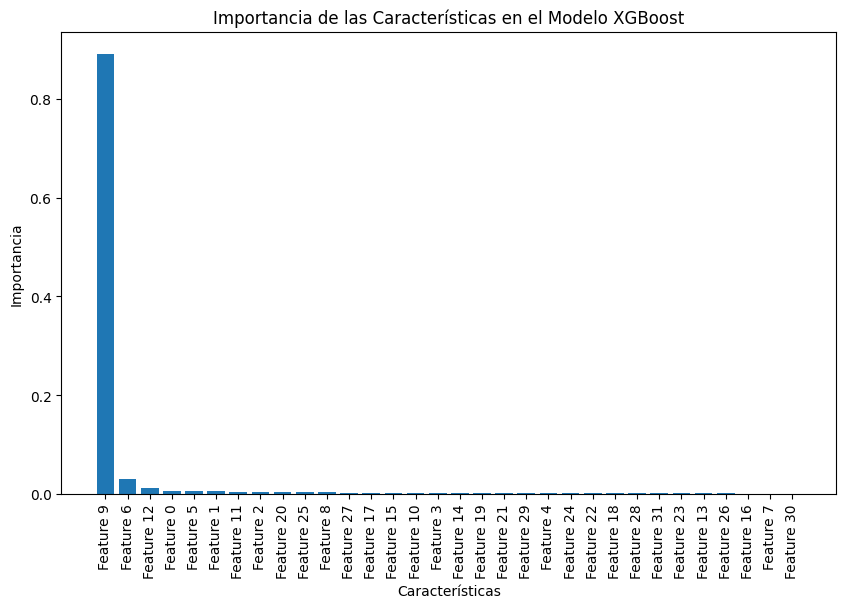

In [61]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# 1. **Preparación de Datos**: Asegurarse de que y_train es un array 1D
# Convertir y_train a una forma de array 1D
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# 2. **Definición del Modelo XGBoost**: Configurar el clasificador XGBoost con parámetros específicos
xg_class = xgb.XGBClassifier(
    objective='multi:softprob',       # Configura la tarea de clasificación multiclase usando softmax
    colsample_bytree=1,                # Usa todas las características en cada árbol
    learning_rate=0.1,                # Tasa de aprendizaje para ajustar la influencia de cada árbol
    max_depth=5,                      # Limita la profundidad máxima de cada árbol para prevenir el sobreajuste
    alpha=10,                         # Aplica una penalización L1 a los coeficientes del modelo
    n_estimators=100                  # Número total de árboles en el bosque, balanceando rendimiento y tiempo de entrenamiento
)

# 3. **Entrenamiento del Modelo**: Ajustar el modelo usando los datos de entrenamiento y evaluarlo con un conjunto de validación
xg_class.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],  # Evalúa el modelo durante el entrenamiento
    eval_metric='mlogloss',  # Métrica de evaluación para clasificación multiclase
    verbose=False  # Suprime los mensajes de entrenamiento
)

# 4. **Validación Cruzada**: Evaluar el modelo usando validación cruzada para obtener una estimación robusta del rendimiento
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xg_class, X_train, y_train, cv=kf)
print("Mean cross-validation score: %.2f" % scores.mean())

# 5. **Evaluación del Modelo**: Calcular métricas de desempeño y generar el informe de clasificación
y_pred4 = xg_class.predict(X_test)
print("\n", metrics.classification_report(y_test, y_pred4, digits=2))

# 6. **Visualización de la Importancia de las Características** (opcional)
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importances = xg_class.feature_importances_
indices = importances.argsort()[::-1]  # Ordenar características por importancia

# Crear un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características en el Modelo XGBoost')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [f'Feature {i}' for i in indices], rotation=90)  # Cambia 'Feature i' por los nombres reales si están disponibles
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()
